In [ ]:
## Phase 1: Data Understanding

#Initial inspection is conducted to assess dataset structure, data types, and suitability 
#for statistical analysis and predictive modelling.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [10]:
df = pd.read_excel("Solar_weather.xlsx")

In [11]:
df.head()

,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,2017-01-01 00:00:00,0,0,1.6,0,100,450
1,2017-01-01 00:15:00,0,0,1.6,0,100,450
2,2017-01-01 00:30:00,0,0,1.6,0,100,450
3,2017-01-01 00:45:00,0,0,1.6,0,100,450
4,2017-01-01 01:00:00,0,0,1.7,0,100,450


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Time                        196777 non-null  object
 1   Energy Captured[Wh]         196777 non-null  object
 2   Sun Light Intensity (W/m2)  196777 non-null  object
 3   Temperature                 196777 non-null  object
 4   1 Hour Rain Fall            196777 non-null  object
 5   Cloud Coverage              196777 non-null  object
 6   Length of Day_Light         196777 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


In [ ]:
#The inspection reveals that variables representing numerical measurements are stored as object data types.  
#This constitutes a critical data quality issue, as statistical analysis and regression 
#modelling require numeric formats.


In [ ]:
## Phase 2: Data Cleaning

#This phase addresses data quality issues identified during initial inspection, 
#including incorrect data types and missing values.


In [14]:
df.columns


Index(['Time', 'Energy Captured[Wh]', 'Sun Light Intensity (W/m2)',
       'Temperature', '1 Hour Rain Fall', 'Cloud Coverage',
       'Length of Day_Light'],
      dtype='object')

In [15]:
# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Define numeric columns based on actual dataset
numeric_columns = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

# Convert numeric columns to numeric dtype
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196777 entries, 0 to 196776
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Time                        196769 non-null  datetime64[ns]
 1   Energy Captured[Wh]         196773 non-null  float64       
 2   Sun Light Intensity (W/m2)  196770 non-null  float64       
 3   Temperature                 196771 non-null  float64       
 4   1 Hour Rain Fall            196773 non-null  float64       
 5   Cloud Coverage              196764 non-null  float64       
 6   Length of Day_Light         196772 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 10.5 MB


In [ ]:
#All variables have been successfully converted to appropriate numeric formats, enabling further 
#statistical analysis and model development.


In [17]:
df.isnull().sum()


Time                           8
Energy Captured[Wh]            4
Sun Light Intensity (W/m2)     7
Temperature                    6
1 Hour Rain Fall               4
Cloud Coverage                13
Length of Day_Light            5
dtype: int64

In [18]:
df = df.dropna()


In [ ]:
#The proportion of missing values is negligible relative to the dataset size.  
#Rows containing missing observations were removed to avoid introducing artificial values through 
#imputation while preserving data integrity.


In [19]:
df.isnull().sum()

Time                          0
Energy Captured[Wh]           0
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64

In [ ]:
## Phase 3: Exploratory Data Analysis (EDA)

#Exploratory analysis is conducted to understand distributions, variability, and relationships between energy 
#capture and environmental variables.


In [20]:
df[numeric_columns].describe()


,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
count,196730.000000,196730.000000,196730.000000,196730.000000,196730.000000,196730.00000
mean,573.078712,32.603001,9.792552,0.066037,65.968586,748.70579
std,1044.871534,52.178241,7.994936,0.278917,36.638523,194.84763
min,-54.000000,0.000000,-16.600000,0.000000,-250.000000,450.00000
25%,0.000000,0.000000,3.600000,0.000000,34.000000,570.00000
50%,0.000000,1.600000,9.300000,0.000000,82.000000,765.00000
75%,578.000000,46.800000,15.700000,0.000000,100.000000,930.00000
max,5020.000000,270.000000,35.800000,8.090000,101.000000,1020.00000


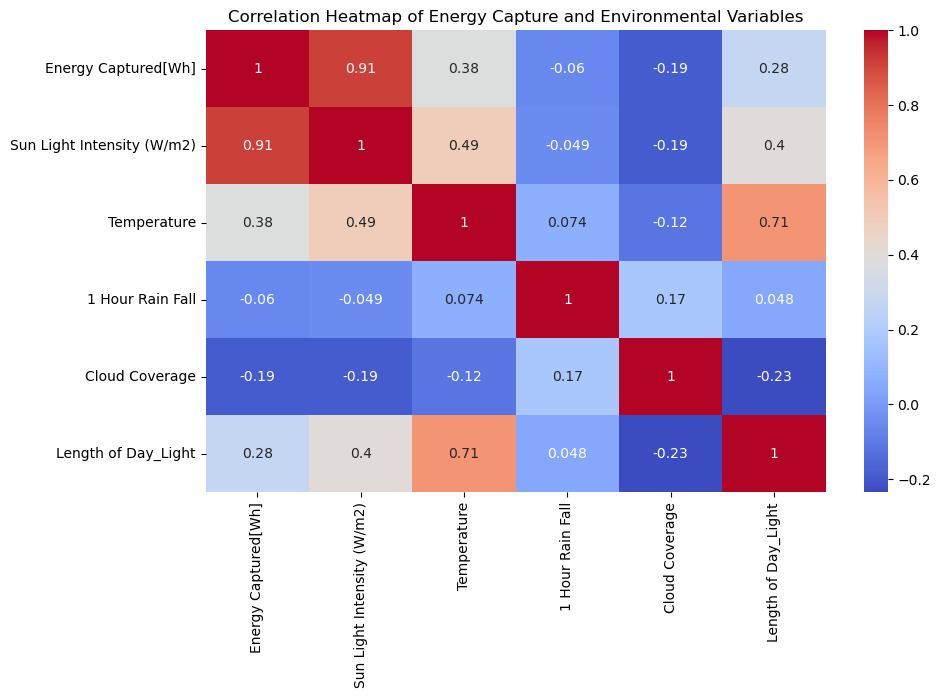

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Energy Capture and Environmental Variables")
plt.show()


In [22]:
#Energy capture exhibits strong positive relationships with sunlight intensity and length of daylight,
#aligning with physical expectations of solar energy generation.


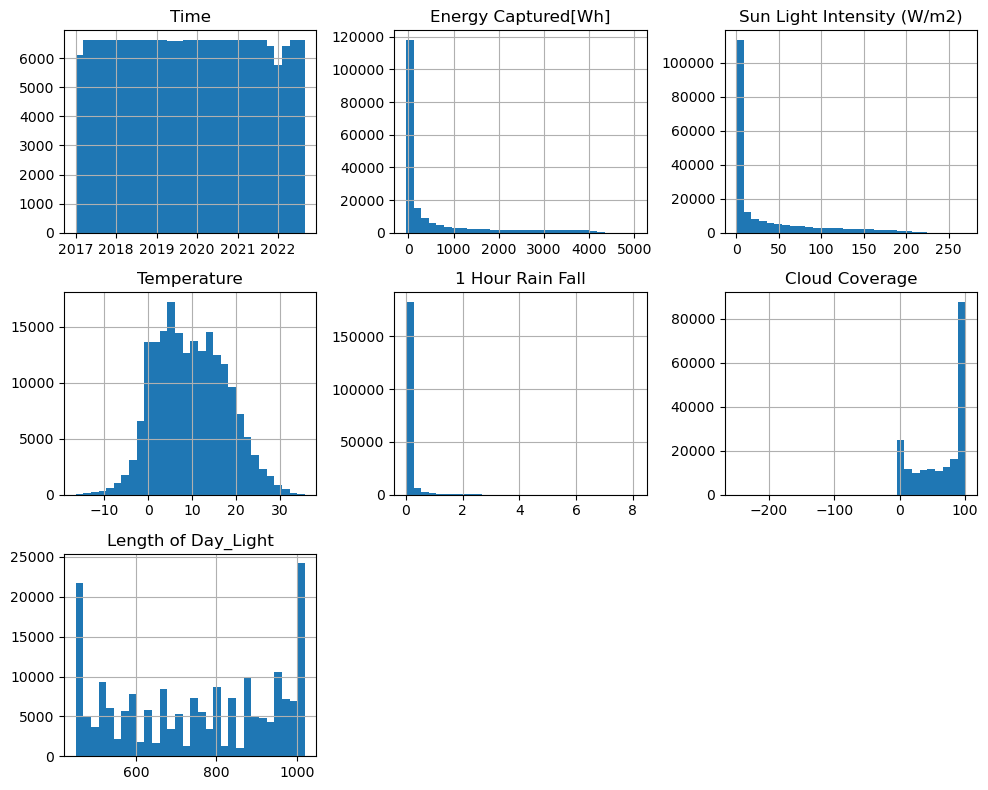

In [27]:
df.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()


In [ ]:
#Interpretation:
#The histograms indicate varying distribution shapes across environmental variables, with noticeable 
#skewness in energy capture and sunlight intensity. 
#These patterns reflect the intermittent nature of solar conditions and justify the application of 
#normalization prior to modelling.


In [28]:
## Phase 4: Normalization & Feature Preparation

#Independent variables are normalized to ensure comparability across different measurement scales 
#and to support stable model training.


In [30]:
X = df[
    [
        'Sun Light Intensity (W/m2)',
        'Temperature',
        '1 Hour Rain Fall',
        'Cloud Coverage',
        'Length of Day_Light'
    ]
]

y = df['Energy Captured[Wh]']


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
X_scaled.mean(), X_scaled.std()


(np.float64(-1.7452053571863996e-17), np.float64(1.0))

In [ ]:
## Phase 5: Modelling

#Two regression-based models are trained: Linear Regression as a baseline model and Random Forest Regressor 
#to capture non-linear relationships.


In [49]:
lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

LinearRegression()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137711, 5), (59019, 5), (137711,), (59019,))

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
## Phase 6: Model Evaluation

#Model performance is evaluated using standard regression metrics to assess predictive accuracy and 
#generalization performance.


In [35]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
    'MAE': [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rf_pred)],
    'MSE': [mean_squared_error(y_test, lr_pred), mean_squared_error(y_test, rf_pred)]
})

results


,Model,R2,MAE,MSE
0,Linear Regression,0.846174,239.788286,165951.255726
1,Random Forest,0.914457,131.884128,92285.902189


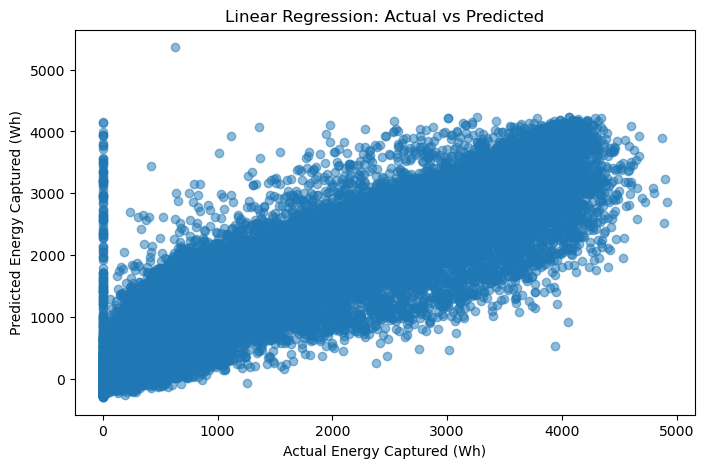

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.xlabel("Actual Energy Captured (Wh)")
plt.ylabel("Predicted Energy Captured (Wh)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

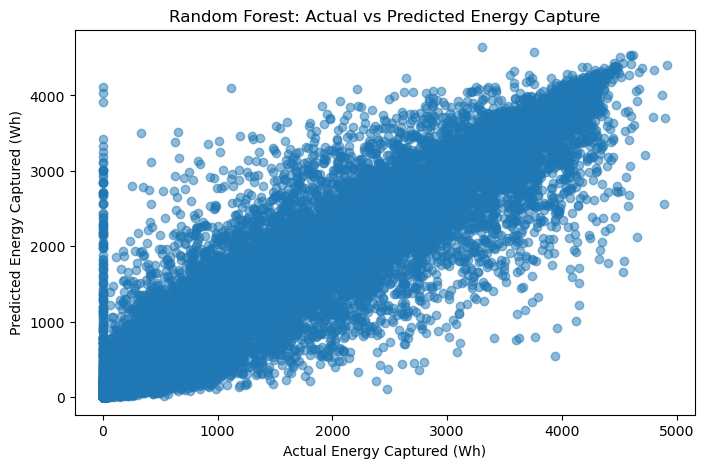

In [46]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.xlabel("Actual Energy Captured (Wh)")
plt.ylabel("Predicted Energy Captured (Wh)")
plt.title("Random Forest: Actual vs Predicted Energy Capture")
plt.show()


In [42]:
#The Random Forest model demonstrates superior predictive performance, indicating a stronger ability to 
#capture non-linear relationships within the data.


In [37]:
## Phase 7: Forecasting & Decision Support

#The best-performing model is applied to forecast average solar energy production for January 2026.


In [39]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

january_data = df[df['Month'] == 1]



In [40]:
january_features = scaler.transform(january_data[numeric_columns[1:]])
january_forecast = rf_model.predict(january_features)

january_2026_forecast = january_forecast.mean()
january_2026_forecast


np.float64(129.4045917863939)

In [ ]:
#The forecasted average solar energy production for January 2026 provides a forward-looking estimate that supports 
#operational planning and decision-making.


In [47]:
january_avg = (
    january_data
    .groupby('Year')['Energy Captured[Wh]']
    .mean()
)


In [48]:
forecast_table = january_avg.to_frame(name="Average Energy Production (Wh)")
forecast_table.loc[2026] = january_2026_forecast

forecast_table


,Average Energy Production (Wh)
Year,
2017,180.018737
2018,125.365165
2019,117.248992
2020,122.447245
2021,83.167339
2022,161.141204
2026,129.404592


In [ ]:
#Interpretation:  
#The forecasted average energy production for January 2026 falls within the range of historical January values, 
#indicating seasonal consistency and supporting the credibility of the forecast.
